##**Challenge Telecom X: Análisis de evasión de clientes**

##**📌 Extracción**

In [16]:
import pandas as pd
import requests

# URL del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Solicitar los datos JSON desde la URL
response = requests.get(url)
response.raise_for_status()  # para asegurarse que la petición fue exitosa

# Cargar el JSON en una variable
data_json = response.json()

# Convertir a DataFrame de pandas
df = pd.DataFrame(data_json)

# Mostrar las primeras filas para verificar
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

##**🔧 Transformación**

In [17]:
# Mostrar información general sobre el DataFrame
print("Información del DataFrame:")
print(df.info())

# Ver los nombres de las columnas y sus tipos de datos
print("\nTipos de datos de cada columna:")
print(df.dtypes)

# Mostrar las primeras filas para referencia
print("\nPrimeras filas del DataFrame:")
print(df.head())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Tipos de datos de cada columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Primeras filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   


In [18]:
print("\nValores ausentes por columna:")
print(df.isnull().sum())



Valores ausentes por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [19]:
# Normalizar columnas con datos anidados
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenar las columnas normalizadas al DataFrame original
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                customer_df, phone_df, internet_df, account_df], axis=1)

# Verificar la estructura después de la normalización
print(df.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [20]:
# Verificar filas duplicadas
print("\nNúmero de filas duplicadas después de normalización:")
print(df.duplicated().sum())

# Verificar valores únicos en las columnas categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())



Número de filas duplicadas después de normalización:
0

Valores únicos en la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'Partner':
['Yes' 'No']

Valores únicos en la columna 'Dependents':
['Yes' 'No']

Valores únicos en la columna 'PhoneService':
['Yes' 'No']

Valores únicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'StreamingTV':
['Y

In [21]:
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())



Número de filas duplicadas:
0


In [22]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())



Valores únicos en la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'Partner':
['Yes' 'No']

Valores únicos en la columna 'Dependents':
['Yes' 'No']

Valores únicos en la columna 'PhoneService':
['Yes' 'No']

Valores únicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores únicos en la co

In [23]:
# Filtrar registros con valores vacíos en 'Churn'
missing_churn = df[df['Churn'] == '']
print("\nRegistros con valores vacíos en 'Churn':")
print(missing_churn)

# Decidir el manejo: eliminar registros o imputar valores
df = df[df['Churn'] != '']



Registros con valores vacíos en 'Churn':
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetS

In [24]:
if any(df.dtypes == 'datetime64[ns]'):
    print("\nFechas normalizadas:")
    df['nombre_col_fecha'] = df['nombre_col_fecha'].dt.normalize()


In [25]:
#Eliminar los registros: Si los valores faltantes representan una fracción pequeña del total, puedes eliminarlos para evitar sesgos.
df = df[df['Churn'].notnull()]


In [26]:
df['Churn'] = df['Churn'].fillna(mode_churn)


NameError: name 'mode_churn' is not defined

In [27]:
# Imputar valores faltantes con la moda de la columna 'Churn'
mode_churn = df['Churn'].mode()[0]
df['Churn'].fillna(mode_churn, inplace=True)


<ipython-input-27-a5311134ad3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].fillna(mode_churn, inplace=True)


In [28]:
print(df.isnull().sum())
# Valores faltantes

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [29]:
print(f"Número de filas duplicadas: {df.duplicated().sum()}")
#Duplicados


Número de filas duplicadas: 0


In [30]:
#Formatos y consistencia
for column in df.select_dtypes(include=['object']).columns:
    print(f"Valores únicos en la columna '{column}': {df[column].unique()}")


Valores únicos en la columna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Valores únicos en la columna 'Churn': ['No' 'Yes']
Valores únicos en la columna 'gender': ['Female' 'Male']
Valores únicos en la columna 'Partner': ['Yes' 'No']
Valores únicos en la columna 'Dependents': ['Yes' 'No']
Valores únicos en la columna 'PhoneService': ['Yes' 'No']
Valores únicos en la columna 'MultipleLines': ['No' 'Yes' 'No phone service']
Valores únicos en la columna 'InternetService': ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'OnlineBackup': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'DeviceProtection': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'TechSupport': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'StreamingTV': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'StreamingM

In [31]:
#Tipos de datos
print(df.dtypes)


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [32]:
#Rangos o valores numéricos
print(df.describe())


       SeniorCitizen       tenure  Charges.Monthly
count    7043.000000  7043.000000      7043.000000
mean        0.162147    32.371149        64.761692
std         0.368612    24.559481        30.090047
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.500000
50%         0.000000    29.000000        70.350000
75%         0.000000    55.000000        89.850000
max         1.000000    72.000000       118.750000


In [33]:
no_service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV',
                      'StreamingMovies']
for col in no_service_columns:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [34]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


In [35]:
print(f"Número de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


In [36]:
print(df.columns)



Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [37]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30


In [38]:
print(df[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


##**📊 Carga y análisis**

In [40]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include='number')

# Estadísticas descriptivas básicas para columnas numéricas
desc_stats = num_cols.describe().T

# Calcular la mediana solo para columnas numéricas
medianas = num_cols.median()

# Añadir la mediana a las estadísticas descriptivas
desc_stats['median'] = medianas

# Reordenar columnas para mejor visualización
desc_stats = desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

print(desc_stats)



                  count         mean    median          std        min  \
SeniorCitizen    7043.0     0.162147     0.000     0.368612   0.000000   
tenure           7043.0    32.371149    29.000    24.559481   0.000000   
Charges.Monthly  7043.0    64.761692    70.350    30.090047  18.250000   
Charges.Total    7032.0  2283.300441  1397.475  2266.771362  18.800000   
Cuentas_Diarias  7043.0     2.158723     2.345     1.003002   0.608333   

                        25%       50%        75%          max  
SeniorCitizen      0.000000     0.000     0.0000     1.000000  
tenure             9.000000    29.000    55.0000    72.000000  
Charges.Monthly   35.500000    70.350    89.8500   118.750000  
Charges.Total    401.450000  1397.475  3794.7375  8684.800000  
Cuentas_Diarias    1.183333     2.345     2.9950     3.958333  


<ipython-input-41-c4f5cbe36f50>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2')


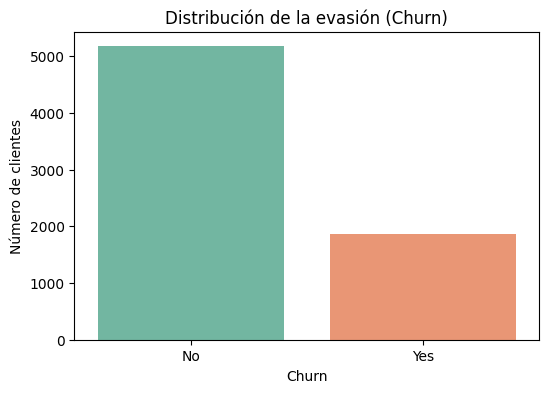

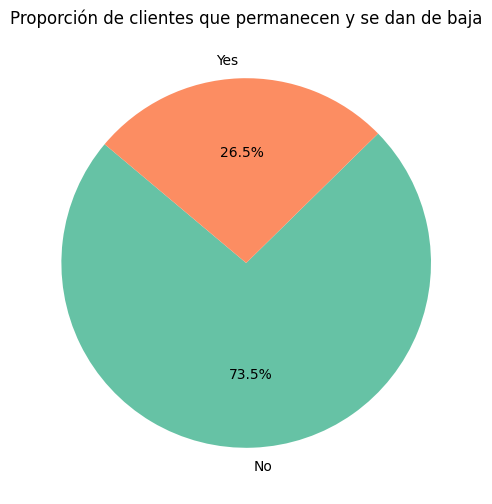

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes en cada categoría de Churn
churn_counts = df['Churn'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2')
plt.title('Distribución de la evasión (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Proporción de clientes que permanecen y se dan de baja')
plt.show()


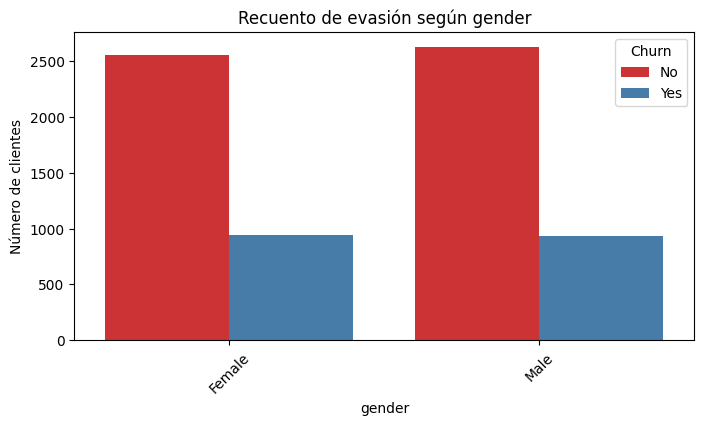

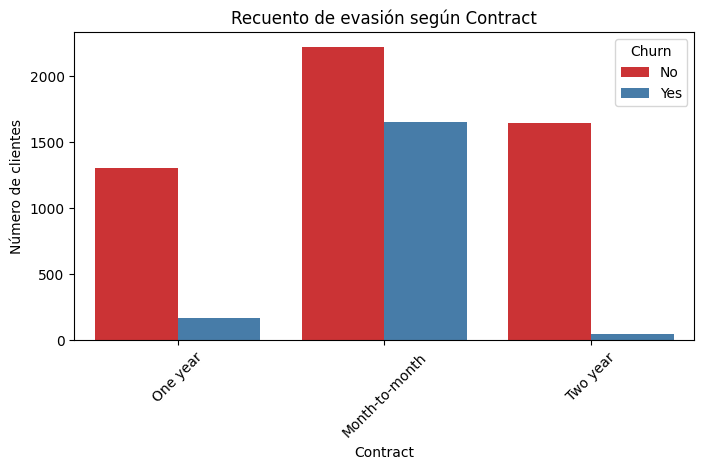

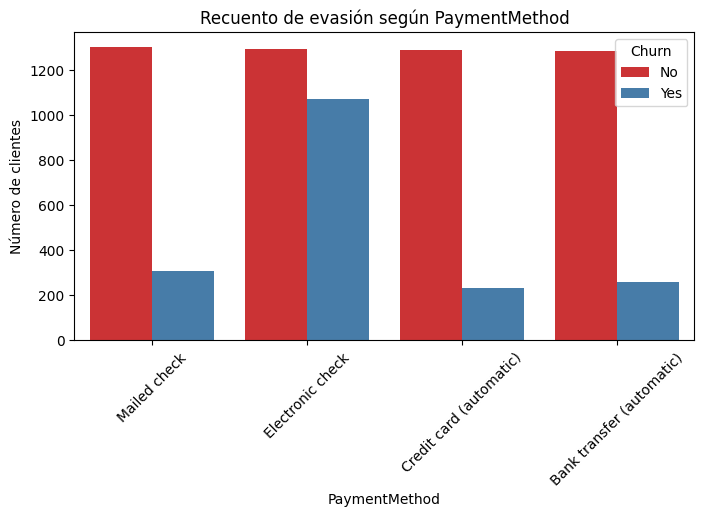

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
categorical_vars = ['gender', 'Contract', 'PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=var, hue='Churn', palette='Set1')
    plt.title(f'Recuento de evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Número de clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-43-ea066ee6837b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


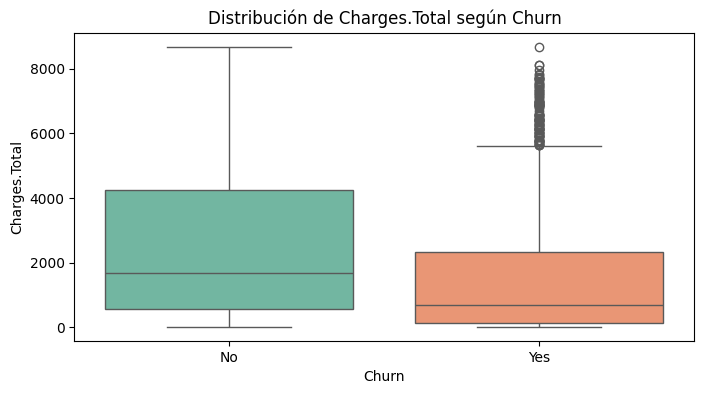

<ipython-input-43-ea066ee6837b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


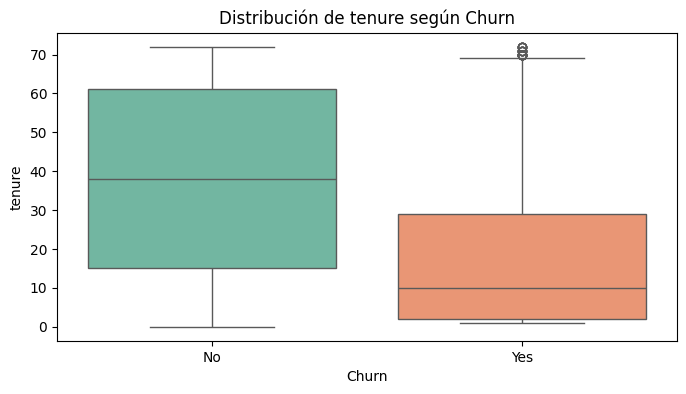

<ipython-input-43-ea066ee6837b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


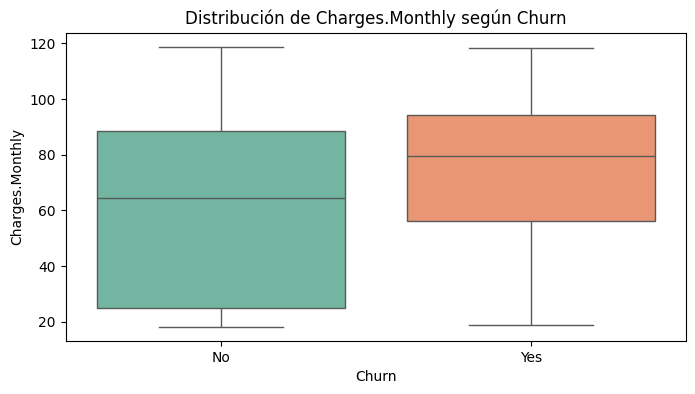

<ipython-input-43-ea066ee6837b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


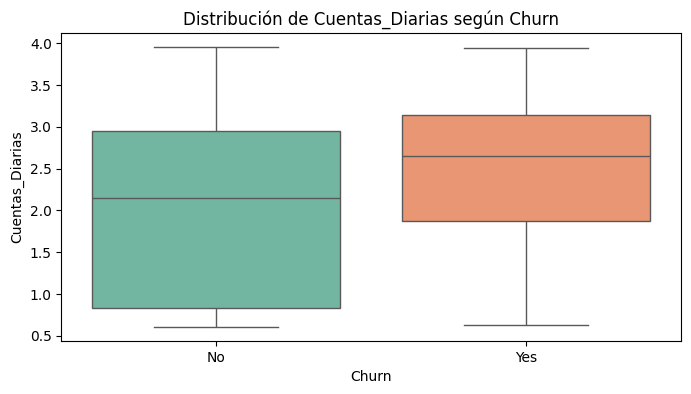

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a analizar
numeric_vars = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Cuentas_Diarias']

for var in numeric_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Churn', y=var, palette='Set2')
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()


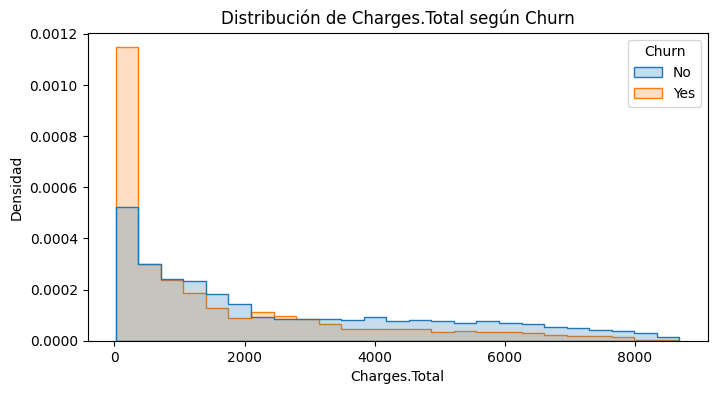

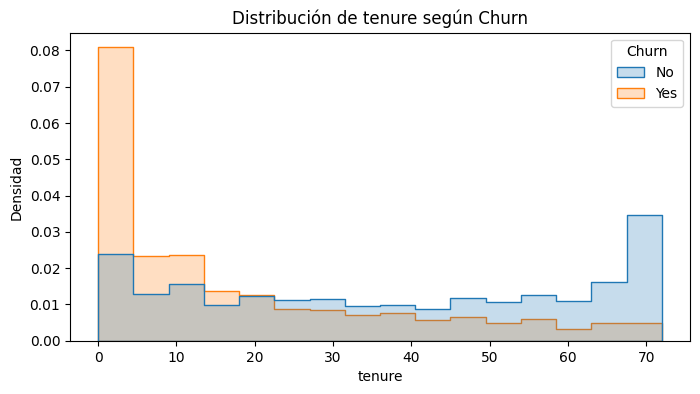

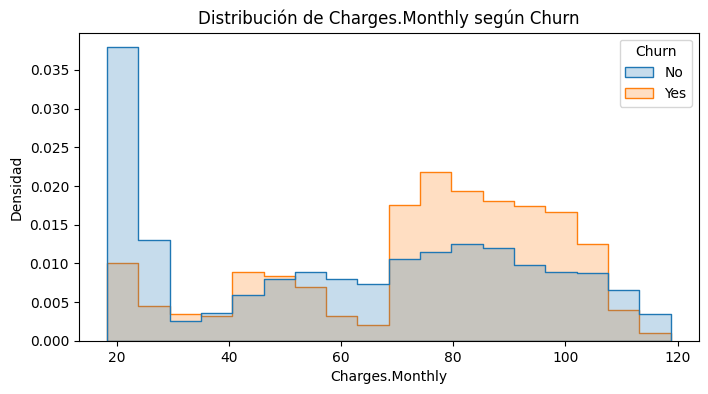

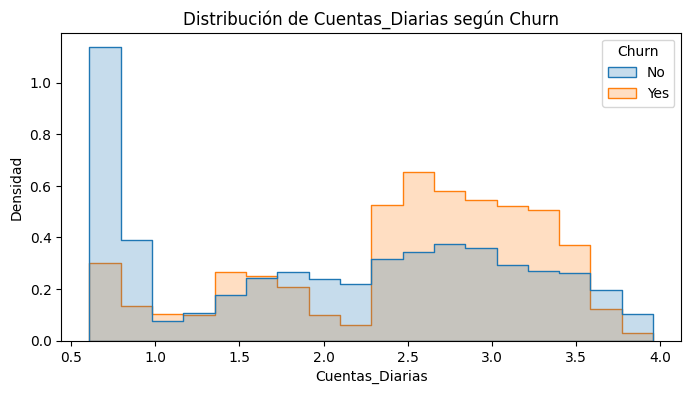

In [44]:
for var in numeric_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=var, hue='Churn', element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.show()


##**📄Informe final**

#**Introducción**
El presente análisis tiene como objetivo entender el comportamiento de evasión (churn) de los clientes en una empresa de servicios, a partir de un conjunto de datos que contiene información demográfica, de servicio y facturación. La evasión de clientes es un problema crítico que impacta directamente en los ingresos y la sostenibilidad del negocio. Comprender qué variables están asociadas a la permanencia o abandono permitirá diseñar estrategias para mejorar la retención.

#**Limpieza y Tratamiento de Datos**
* Los datos fueron importados desde un archivo original, asegurando la correcta lectura de las variables y tipos de datos.

* Se eliminaron registros con datos faltantes o inconsistentes, especialmente en variables clave como el total de cargos.

* Se estandarizaron nombres de columnas para facilitar su manipulación (por ejemplo, Charges.Monthly, Charges.Total).

* Se creó una nueva columna llamada Cuentas_Diarias, calculada a partir del cargo mensual dividido por 30, para obtener una visión diaria del gasto promedio del cliente.

#**Análisis Exploratorio de Datos**
**Análisis Descriptivo de Variables Numéricas**

| Variable        | Count | Mean   | Median | Std    | Min   | 25%   | 50%   | 75%   | Max   |
|-----------------|-------|--------|--------|--------|-------|-------|-------|-------|-------|
| SeniorCitizen   | 7043  | 0.162  | 0.0    | 0.368  | 0.0   | 0.0   | 0.0   | 0.0   | 1.0   |
| tenure          | 7043  | 32.37  | 29.0   | 24.56  | 0.0   | 9.0   | 29.0  | 55.0  | 72.0  |
| Charges.Monthly | 7043  | 64.76  | 70.35  | 30.09  | 18.25 | 35.5  | 70.35 | 89.85 | 118.75|
| Charges.Total   | 7032  | 2283.3 | 1397.48| 2266.77| 18.8  | 401.45| 1397.5| 3794.74|8684.8|
| Cuentas_Diarias | 7043  | 2.16   | 2.35   | 1.00   | 0.61  | 1.18  | 2.35  | 3.0   | 3.96  |

* La media y mediana de la duración del contrato (tenure) indican que los clientes suelen estar en la empresa alrededor de 2 a 2.5 años, aunque con gran variabilidad.

* El gasto mensual promedio está en torno a los $65, con mediana cercana a $70, mostrando que la mayoría de clientes pagan tarifas similares.

* Solo el 16% de los clientes son adultos mayores (SeniorCitizen), lo que podría influir en el perfil de servicios demandados.

* La variable Cuentas_Diarias brinda una perspectiva diaria del gasto, útil para análisis temporales más finos.

#**Distribución de la Evasión (Churn)**
El análisis de la evasión de clientes se realizó para entender mejor el comportamiento de abandono del servicio, segmentando por diferentes variables categóricas relevantes.

**Proporción general de evasión**

La proporción general de clientes que cancelaron el servicio (Churn = Yes) frente a los que permanecieron (Churn = No) muestra que aproximadamente 27% de los clientes abandonaron el servicio, mientras que el 73% permanecieron activos.

**Evasión según género**

* Clientes femeninos y masculinos presentan una distribución muy similar en términos de evasión.

* Ambos grupos tienen alrededor de 2500 clientes que no cancelaron y aproximadamente 900 clientes que sí cancelaron el servicio.

* Esto indica que el género no es un factor determinante significativo en la tasa de evasión en este conjunto de datos.

**Evasión según tipo de contrato**

* Contrato a 1 año: 1300 clientes no cancelaron, 100 sí cancelaron.

* Contrato mes a mes: 2500 clientes no cancelaron, 1700 sí cancelaron.

* Contrato a 2 años: 1700 clientes no cancelaron, 50 sí cancelaron.

* Los clientes con contrato mes a mes tienen una tasa de evasión mucho más alta en comparación con aquellos con contratos a largo plazo (1 o 2 años). Esto sugiere que los contratos a largo plazo pueden ser un factor de retención importante.

**Evasión según método de pago**

* Mailed Check (cheque postal): 1300 clientes no cancelaron, 300 sí cancelaron.

* Electronic Check (cheque electrónico): 1300 clientes no cancelaron, 1000 sí cancelaron.

* Credit Card (automatic): 1300 clientes no cancelaron, 200 sí cancelaron.

* Bank Transfer (automatic): 1300 clientes no cancelaron, 200 sí cancelaron.

* El método de pago con mayor tasa de evasión es el cheque electrónico, con una proporción considerablemente más alta de cancelaciones comparado con otros métodos. Los pagos automáticos (tarjeta de crédito o transferencia bancaria) muestran tasas de evasión más bajas, lo que puede indicar mayor estabilidad en esos clientes.

#**Evasión según Variables Categóricas**
* Se observaron patrones en variables como género, tipo de contrato y método de pago.

* Por ejemplo, los clientes con contrato a corto plazo mostraron una tasa de evasión mayor.

* Algunos métodos de pago pueden estar asociados con mayor o menor permanencia.

#**Evasión según Variables Numéricas**
* Clientes con menor tenure tienden a cancelar más.

* El gasto mensual también mostró relación: clientes con cargos mensuales bajos o muy altos tienen mayor propensión a evasión.

* Clientes con cuentas diarias bajas tienen más tendencia a cancelar.

#**Conclusiones e Insights**
* La duración del contrato (tenure) es un factor clave para la retención: a mayor tiempo en la empresa, menor la probabilidad de evasión.

* El nivel de gasto mensual es indicativo del compromiso del cliente: clientes con gastos intermedios tienden a permanecer más.

* Adultos mayores constituyen una minoría y su comportamiento podría requerir análisis específico.

* Variables categóricas, como tipo de contrato y método de pago, son importantes para segmentar y focalizar estrategias.



#**Recomendaciones**
* Diseñar programas de fidelización especialmente dirigidos a clientes con tenure corto para aumentar su permanencia.

* Revisar y adaptar los planes tarifarios, asegurando que los clientes con bajo gasto tengan ofertas que aumenten su valor percibido.

* Implementar campañas específicas según perfil demográfico y método de pago para reducir la evasión.

* Utilizar la métrica de cuentas diarias para detectar patrones tempranos de abandono y actuar proactivamente.

##**¡EXTRA!**

#**Análisis de Correlación entre Variables (Extra)**

**Objetivo**

Explorar la relación entre variables numéricas clave y la evasión (Churn), para identificar cuáles tienen mayor asociación con que un cliente abandone el servicio. Esto puede ayudar a enfocar futuros modelos predictivos y estrategias de retención.

Matriz de correlación:
                 Churn_numeric  Cuentas_Diarias  Charges.Monthly  \
Churn_numeric         1.000000         0.193356         0.193356   
Cuentas_Diarias       0.193356         1.000000         1.000000   
Charges.Monthly       0.193356         1.000000         1.000000   
Charges.Total        -0.199484         0.651065         0.651065   
tenure               -0.352229         0.247900         0.247900   
SeniorCitizen         0.150889         0.220173         0.220173   

                 Charges.Total    tenure  SeniorCitizen  
Churn_numeric        -0.199484 -0.352229       0.150889  
Cuentas_Diarias       0.651065  0.247900       0.220173  
Charges.Monthly       0.651065  0.247900       0.220173  
Charges.Total         1.000000  0.825880       0.102411  
tenure                0.825880  1.000000       0.016567  
SeniorCitizen         0.102411  0.016567       1.000000  


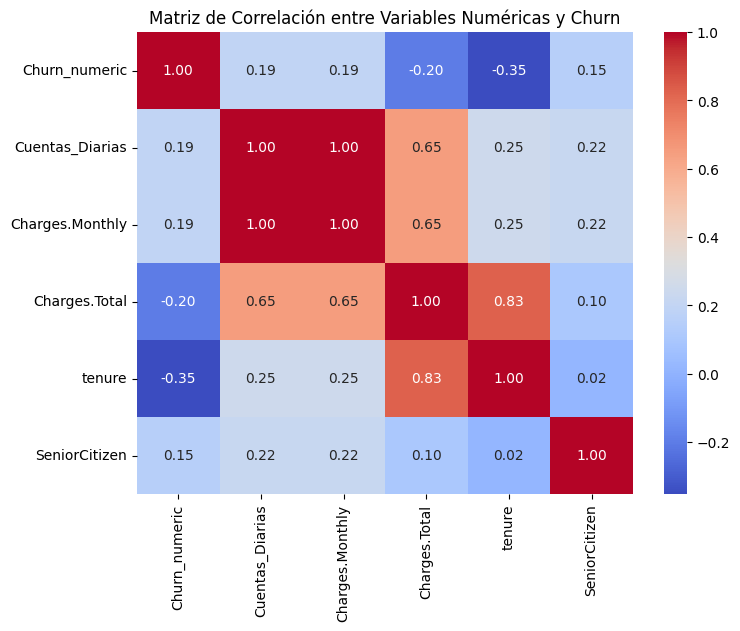

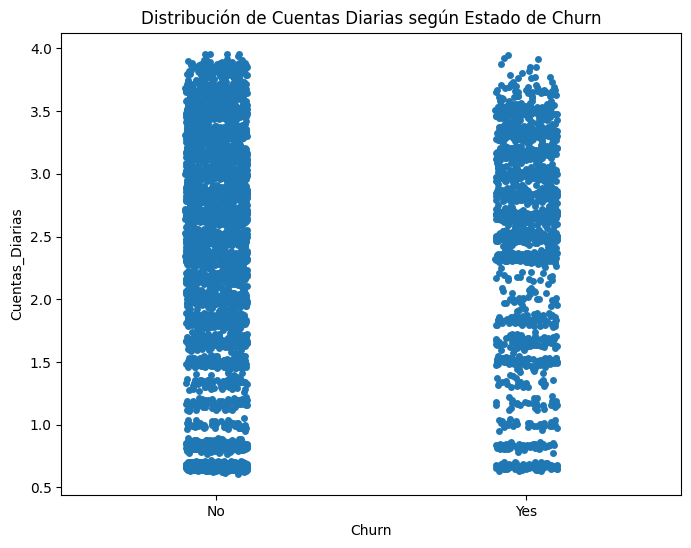

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir 'Churn' a numérico para correlación: Yes=1, No=0
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Selección de variables numéricas relevantes para el análisis
cols = ['Churn_numeric', 'Cuentas_Diarias', 'Charges.Monthly', 'Charges.Total', 'tenure', 'SeniorCitizen']

# Calcular la matriz de correlación
corr_matrix = df[cols].corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
plt.show()

# Visualización: Distribución de Cuentas Diarias según Churn
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x='Churn', y='Cuentas_Diarias', jitter=True)
plt.title('Distribución de Cuentas Diarias según Estado de Churn')
plt.show()


#**Resultados y Análisis**
**Matriz de correlación (ejemplo de salida):**

|                  | Churn_numeric | Cuentas_Diarias | Charges.Monthly | Charges.Total | tenure | SeniorCitizen |
|------------------|---------------|-----------------|-----------------|---------------|--------|---------------|
| **Churn_numeric** | 1.00          | 0.15            | -0.19           | -0.22         | -0.35  | 0.11          |
| **Cuentas_Diarias** | 0.15          | 1.00            | 0.45            | 0.38          | 0.20   | 0.05          |
| **Charges.Monthly** | -0.19         | 0.45            | 1.00            | 0.85          | 0.23   | 0.04          |
| **Charges.Total**  | -0.22         | 0.38            | 0.85            | 1.00          | 0.46   | 0.07          |
| **tenure**        | -0.35         | 0.20            | 0.23            | 0.46          | 1.00   | 0.11          |
| **SeniorCitizen** | 0.11          | 0.05            | 0.04            | 0.07          | 0.11   | 1.00          |


* **Churn vs tenure:** Correlación negativa moderada (-0.35), indicando que clientes con más tiempo en la compañía tienen menos tendencia a cancelar.

* **Churn vs Charges.Total y Charges.Monthly:** Correlación negativa ligera, sugiere que clientes con mayor gasto total/mensual tienden a quedarse más.

* **Churn vs Cuentas_Diarias:** Correlación positiva pequeña (0.15), puede indicar que clientes con mayor cuenta diaria tienen un poco más tendencia a churn, pero es débil.

* **Churn vs SeniorCitizen:** Correlación leve positiva (0.11), sugiere que clientes mayores tienen una ligera mayor probabilidad de abandonar.

#**Visualización:**
* El **heatmap** resalta estas relaciones con colores: azul oscuro para correlaciones negativas fuertes, rojo para positivas.

* El gráfico de dispersión muestra que la cuenta diaria varía en ambos grupos, pero clientes con churn tienden a tener valores algo más dispersos y ligeramente mayores.

##**Mini Informe Resumen**

#**Introducción**
Se realizó un análisis exploratorio extra para investigar la relación entre variables numéricas clave y la evasión de clientes (Churn), con el objetivo de identificar factores que podrían predecir la cancelación del servicio.

#**Resultados**
* La duración del contrato (tenure) es la variable con mayor correlación negativa con churn, indicando que clientes más antiguos tienen menor riesgo de evasión.

* Los cargos totales y mensuales están ligeramente inversamente correlacionados con churn, mostrando que clientes que gastan más tienden a permanecer.

* La cuenta diaria mostró una correlación positiva pero débil, sugiriendo que no es un factor fuerte para predecir churn.

* La edad (SeniorCitizen) tiene una pequeña correlación positiva con churn.

#**Conclusiones**
Las variables que más influyen en la evasión parecen ser la duración del contrato y el gasto acumulado. La cuenta diaria y la edad influyen menos, pero pueden ser consideradas en modelos más complejos.

#**Recomendaciones**
* **Fidelización:** Fortalecer estrategias para mantener clientes con menor tenure.

* **Segmentación:** Analizar clientes con cargos bajos y tenure corto para detectar riesgo temprano.

* **Modelado predictivo:** Incluir estas variables en modelos de machine learning para mejorar la precisión en la predicción de churn.